**<span style="color:crimson;">Context**

Sentiment analysis helps us extract, score, classify and visualize the feelings and opinions that our customers display in their reviews of our business. Are they expressing opinions or feelings that are positive, negative or neutral.

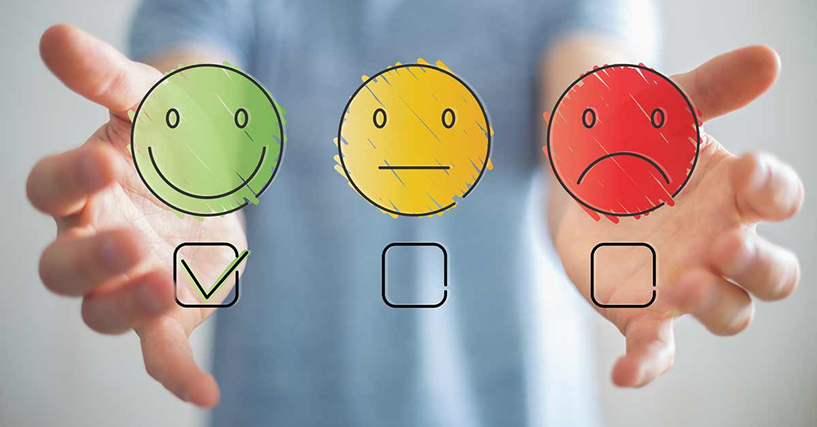

**<span style="color:crimson;">Business Problem**
    
This dataset contains product reviews and metadata from Amazon for the product with the most comments in the electronics category.  
The aim of this notebook is classifying the positive and negative reviews of the customers and building a supervised learning model to polarize large amounts of reviews. 


**<span style="color:crimson;">Task Details**
    
* [1. Importing Libraries and Data](#section-one)
    
* [2. Text Preprocessing](#section-two)
    * [2.1 Normalizing Case Folding](#sub_section-2.1)
    * [2.2 Punctuations](#sub_section-2.2)
    * [2.3 Numbers](#sub_section-2.3)
    * [2.4 Stopwords](#sub_section-2.4)
    * [2.5 Rarewords](#sub_section-2.5)
    * [2.6 Tokenization](#sub_section-3.4)
    * [2.7 Lemmatization](#sub_section-3.5)
    
 
* [3. Text Visualization](#section-three)
    * [3.1 Calculation of Term Frequencies](#sub_section-3.1)
    * [3.2 Barplot](#sub_section-3.2)
    * [3.3 Wordcloud](#sub_section-3.3)
   
    
* [4.Sentiment Analysis](#section-four)
 
* [5. Sentiment Modeling](#section-five)
    * [5.1 Creating Target](#sub_section-5.1)
    * [5.2 Count Vectors](#sub_section-5.2)
    * [5.3 TF-IDF](#sub_section-5.3)
    
         
 * [6. Modeling with Random Forests](#section-five)
    * [6.1 Hyperparameter Optimization](#sub_section-5.1)
        

    

<a id="section-one"></a>
# <span style="color:crimson;">1. Importing Libraries and Data

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install nltk        
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/kaggle/input/amazon-reviews/amazon_reviews.csv


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv("../input/amazon-reviews/amazon_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="section-two"></a>
# <span style="color:crimson;">2. Text Preprocessing

First of all, we standardize all letters in order to get rid of the capital-lower case differences in the text we are interested in. Then we will clean up the punctuations and numbers in the text.

<a id="sub_section-2.1"></a>
## <span style="color:crimson;">2.1 Normalizing Case Folding

In [3]:
df['reviewText'] = df['reviewText'].str.lower()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. i should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out great.had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","bought it with retail packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="sub_section-2.2"></a>
## <span style="color:crimson;">2.2 Punctuations

In [4]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adve...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out greathad a diff bran...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit ...,5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="sub_section-2.3"></a>
## <span style="color:crimson;">2.3 Numbers

In [5]:
df['reviewText'] = df['reviewText'].str.replace('\d', '')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",no issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased this for my device it worked as adve...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected i should have sprung for ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",this think has worked out greathad a diff bran...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought it with retail packaging arrived legit ...,5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="sub_section-2.4"></a>
## <span style="color:crimson;">2.4 Stopwords

Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [6]:
sw = stopwords.words('english')
sw[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [7]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",works expected sprung higher capacity think ma...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked greathad diff bran gb card went s...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit orange e...,5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="sub_section-2.5"></a>
## <span style="color:crimson;">2.5 Rarewords

In [8]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()

drops = temp_df[temp_df <= 1]

df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",works expected higher capacity think made bit ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="sub_section-2.6"></a>
## <span style="color:crimson;">2.6 Tokenization

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms.  

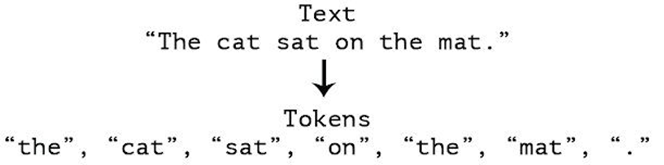

In [9]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, gb, card, went, south, one, he...
4    [bought, retail, packaging, arrived, legit, en...
Name: reviewText, dtype: object

<a id="sub_section-2.7"></a>
## <span style="color:crimson;">2.7 Lemmatization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma

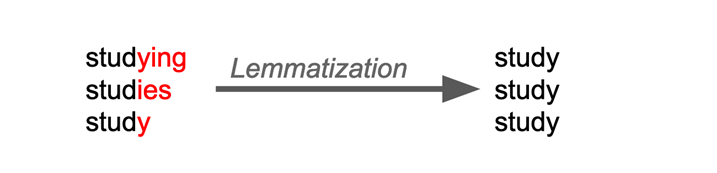

In [10]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0


<a id="section-three"></a>
# <span style="color:crimson;">3. Text Visualization

<a id="sub_section-3.1"></a>
## <span style="color:crimson;">3.1 Calculation of Term Frequencies

In [11]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issue,609.00
1,purchased,344.00
2,device,584.00
3,worked,460.00
4,advertised,111.00


In [12]:
tf.shape

(3688, 2)

In [13]:
tf["words"].nunique()

3688

In [14]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   3688.00
mean      32.31
std      140.41
min        1.00
5%         2.00
10%        2.00
25%        2.00
50%        5.00
75%       16.25
80%       23.60
90%       58.30
95%      123.00
99%      514.13
max     5537.00
Name: tf, dtype: float64

<a id="sub_section-3.2"></a>
## <span style="color:crimson;">3.2 Barplot

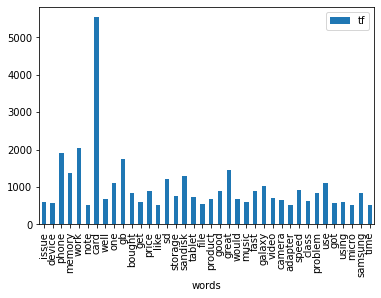

In [15]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()


<a id="sub_section-3.3"></a>
## <span style="color:crimson;">3.3 Wordcloud

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

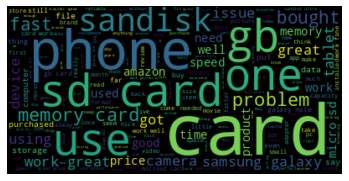

In [16]:
text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

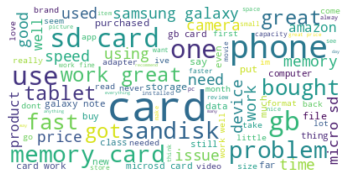

In [17]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id="section-four"></a>
# <span style="color:crimson;">4. Sentiment Analysis

Sentiment analysis is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [18]:
sia = SentimentIntensityAnalyzer()
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86


Figure shows the distribution of polarity score in reviews. Most of the reviews are on positive side of the plot 

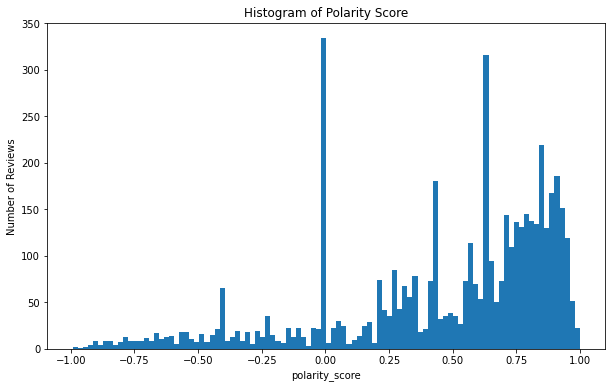

In [19]:

num_bins = 100
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity_score, num_bins)
plt.xlabel('polarity_score')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

<a id="section-five"></a>
# <span style="color:crimson;">5. Sentiment Modeling

<a id="sub_section-5.1"></a>
## <span style="color:crimson;">5.1 Creating Target

This classification model is a text classification model. When asked for various comments on this model, I would like to guess whether this comment is positive or negative, but we do not have the label to do so yet. That's why we create a label first.

In [20]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issue,4.00,Four Stars,1406073600,2014-07-23,138,0,0,0.00,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expected higher capacity think made bit e...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked gb card went south one held prett...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos


In [21]:
df["sentiment_label"].value_counts()

pos    3944
neg     971
Name: sentiment_label, dtype: int64

In [22]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.09
pos   4.71
Name: overall, dtype: float64

This is our dependent variable, but not binary encoded yet.String expressions are available. We need to pass it through label encoder

In [23]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
y = df["sentiment_label"]

Let's set this variable as the dependent variable y.
Let's also take the variable review text in the same dataframe and let this be our argument. But there is a problem here, these are texts, they do not have a measurement value at the moment, they need to be brought into a measurable format.  
We can do this in 2 ways, with the count vectorizer or with the tf-idf vectorizer.

<a id="sub_section-5.2"></a>
## <span style="color:crimson;">5.2 Count Vectors

Sklearn provides facilities to extract numerical features from a text document by tokenizing, counting and normalising.   
CountVectorizer performs the task of tokenizing and counting, while TfidfTransformer normalizes the data. TfidfVectorizer, on the other hand, performs all three operations, thereby streamlining the process of natural language processing

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# word 
vectorizer_c = CountVectorizer()
X_c = vectorizer_c.fit_transform(X)
#vectorizer_c.get_feature_names()


In [25]:
X_c.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

n-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document.

In [26]:
# n-gram 
vectorizer_n = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer_n.fit_transform(X)
#vectorizer_n.get_feature_names()
X_n.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<a id="sub_section-5.3"></a>
## <span style="color:crimson;">5.3 TF-IDF

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [27]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)
tf_idf_word_vectorizer.get_feature_names()
X_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_word_vectorizer.fit_transform(X)
#tf_idf_ngram_vectorizer.get_feature_names()
X_tf_idf_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<a id="section-six"></a>
# <span style="color:crimson;">6. Modeling with Random Forests

After creating the word vectors, we can now apply machine learning methods.

In [29]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_c, y)
cross_val_score(rf_model, X_c, y, cv=5, n_jobs=-1).mean()

0.8402848423194303

In [30]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8268565615462868

In [31]:
# TF-IDF N-GRAM
rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8250254323499491

<a id="sub_section-6.1"></a>
## <span style="color:crimson;">6.1 Hyperparameter Optimization

In [32]:

rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X_c, y)

rf_best_grid.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [33]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_c, y)

cv_results = cross_validate(rf_final, X_c, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

In [34]:
cv_results['test_accuracy'].mean()

0.8366226117903971

Our aim was to classify these comments. When a comment is received using a machine learning method, we are 83% successful in predicting whether it is positive or negative. In other words, 83 of our 100 predictions were successful.

In [35]:
cv_results['test_f1'].mean()

0.9060284810580974

In [36]:
cv_results['test_roc_auc'].mean()

0.8769141252319769